# Animating Plots with Matplotlib

Sometimes you have data or a model that has a time dependence. You can plot snapshots of the data and get a sense for what is happening, but it would be more useful to be able to see the motion in time.

## Plot Review

Let's take a look at plotting the following function of x and t.

$f(x,t) = t(3x + 2) + (1-t)(x^2 -10)$

We restrict t to be between 0 and 1.

In [11]:
def f(x,t):
    return t*(3*x + 2) + (1-t)*(x**2 - 10)

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [13]:
ts = np.linspace(0,1,4)
xs = np.linspace(-5,5,100)

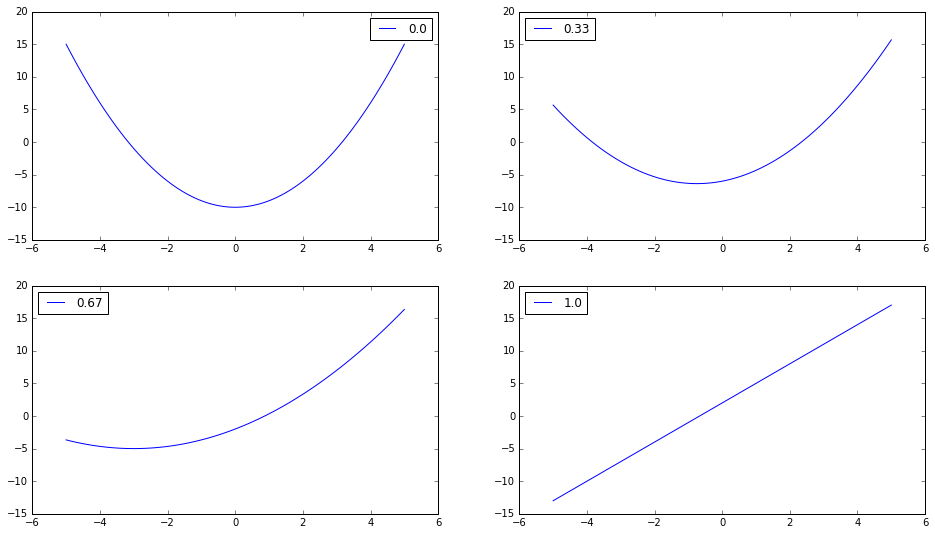

In [18]:
plt.figure(figsize=(16,9))
for i in range(4):
    plt.subplot(221+i)
    plt.plot(xs,f(xs,ts[i]), label=str(round(ts[i],2)))
    plt.legend(loc='best')
    plt.xlim([-6,6])
    plt.ylim([-15,20])

So we defined a function f to implement our function. We then made two arrays, one for the x values and one for the t values (only made 4 t values between 0 and 1). Then we used subplots to show what the function is doing at different times.

It's worth explaining what f is doing. When $t=0$, f returns a parabola, when $t=1$ f returns a line. Any time t is in between we have a smooth combination of the two.

## Basic Animation Example

We'll take a look at a basic animation example from matplotlib's examples (http://matplotlib.org/1.4.1/examples/animation/animate_decay.html). 

[We won't be able to run it in this notebook because it won't animate here. I encourage you to get the code yourself and run it.]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation    # This is where the magic comes from

def data_gen():
    """
    This is a data generator. It will return the time t, and the value of the function
    sin(2 pi t) * exp(-t/10), iteratively. It will do so 1000 times.
    """
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)
data_gen.t = 0

fig, ax = plt.subplots()          # Make a subplot and get the figure and axis objects
line, = ax.plot([], [], lw=2)     # Plot an empty line, ie get a line object
ax.set_ylim(-1.1, 1.1)            # Set limits for x and y
ax.set_xlim(0, 5)
ax.grid()                         # Make a grid appear in the background.
xdata, ydata = [], []             # Make two empty lists, this is where our data is going
def run(data):
    """
    This function runs data_gen and updates the xdata and ydata before updating the line
    object; it will also reset the x limits. It returns the line object.
    """
    # update the data
    t,y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()    # Draw the new image with expanded x limits
    line.set_data(xdata, ydata)    # Put the data in the line object

    return line,

# This is the function that runs the "run" function and plots the data and displays it when the window is built
ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

### animation.FuncAnimation
Let's take a look at that last function in more detail.

http://matplotlib.org/api/animation_api.html

[CTRL - F FuncAnimation]

 class matplotlib.animation.FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, **kwargs)

    Bases: matplotlib.animation.TimedAnimation

    Makes an animation by repeatedly calling a function func, passing in (optional) arguments in fargs.

    frames can be a generator, an iterable, or a number of frames.

    init_func is a function used to draw a clear frame. If not given, the results of drawing from the first item in the frames sequence will be used. This function will be called once before the first frame.

    If blit=True, func and init_func must return an iterable of artists to be re-drawn.

    kwargs include repeat, repeat_delay, and interval: interval draws a new frame every interval milliseconds. repeat controls whether the animation should repeat when the sequence of frames is completed. repeat_delay optionally adds a delay in milliseconds before repeating the animation. 

## Let's Animate our Example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(x,t):
    return t*(3*x + 2) + (1-t)*(x**2 - 10)

frames = 1000
ts = np.linspace(0,1,frames)
xs = np.linspace(-5,5,1000)

fig, ax = plt.subplots()
line, = ax.plot([], [])
plt.xlim([-6,6])
plt.ylim([-15,20])

def run(i):
    t = ts[i]
    ys = f(xs,t)
    
    line.set_data(xs,ys)
    
    return line,

ani = animation.FuncAnimation(fig, run, frames=frames, blit=True, interval=5, repeat=True)
plt.show()

# Project

In support of building a little model of the solar system, we should make a function that animates data from a text file. That is, given the name of a text file, it should go in and read the data from the file and plot it.

There are two data files: circle.txt and oneOverX.txt. They have the form:

time | x1 | y1 | x2 | y2 | ... | xn | yn |

Each pair (x,y) will be a point at time t. So instead of a line object, we want a scatter object. Your code should be able to read anywhere from 1 to n (x,y) pairs.